In [11]:
from bs4 import BeautifulSoup
import requests
print(requests.__version__)

2.28.1


In [126]:
url='https://coinmarketcap.com/'
page=requests.get(url)

<!DOCTYPE html>
<html dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <script data-domain-script="018e37fb-7a80-717a-a1d2-ba0e159ee446" src="https://cdn.cookielaw.org/scripttemplates/otSDKStub.js" type="text/javascript">
  </script>
  <script type="text/javascript">
   function OptanonWrapper() {}
  </script>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no, shrink-to-fit=no" name="viewport"/>
  <script>
   (function() {window.__renderTime__ = {"pageRender":1713039783248};window.__renderTime__.pageLoad = Date.now();})()
  </script>
  <script>
   (function() {if (!!window.__RESOURCE_ERROR__) return;window.__RESOURCE_ERROR__ = [];var collectError = function(item) { window.__RESOURCE_ERROR__.push(item) };var _oldFetch = window.fetch;var _oldOpen = XMLHttpRequest.prototype.open;var _oldSend = XMLHttpRequest.prototype.send;window.fetch = function() {var __url__ = arguments[0] && (argumen
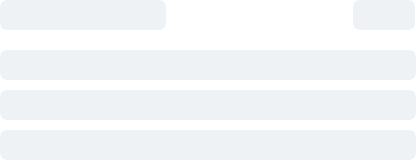

In [127]:
cryptoSoup=BeautifulSoup(page.content, 'html.parser')
print(cryptoSoup.prettify())

In [117]:
priceBox=cryptoSoup.find("div", class_="flex flex-col relative max-w-full overflow-auto gap-4 p-2")
print((priceBox.prettify()))


AttributeError: 'NoneType' object has no attribute 'prettify'

In [223]:
# priceBox=cryptoSoup.find("div", class_="sc-14cb040a-2 hptPYH")
priceBox=cryptoSoup.find("table",class_="sc-14cb040a-3 dsflYb cmc-table")

print(priceBox.prettify())

<table class="sc-14cb040a-3 dsflYb cmc-table">
 <colgroup>
  <col/>
  <col style="width:50px;min-width:auto;max-width:auto"/>
  <col style="width:250px;min-width:auto;max-width:auto"/>
  <col/>
  <col style="width:84px;min-width:auto;max-width:auto"/>
  <col style="width:84px;min-width:auto;max-width:auto"/>
  <col style="width:84px;min-width:auto;max-width:auto"/>
  <col style="width:200px;min-width:auto;max-width:auto"/>
  <col style="width:200px;min-width:auto;max-width:auto"/>
  <col style="width:200px;min-width:auto;max-width:auto"/>
  <col/>
 </colgroup>
 <thead>
  <tr>
   <th class="stickyTop">
   </th>
   <th class="stickyTop" style="text-align:start">
    <div class="sc-77ac5b56-0 eKOoHe sortable-header-container">
     <div class="sc-77ac5b56-1 jMGmXE">
      <p class="sc-4984dd93-0 fiHcNM rank-column-title" color="text" data-sensors-click="true" font-size="0">
       #
      </p>
      <span class="sc-77ac5b56-2 dLEXCr icon-wrapper">
      </span>
     </div>
    </div>
   <

<a class="cmc-link" href="/currencies/bitcoin/#markets"><span>$62,665.32</span></a>


In [224]:
coinList=priceBox.find_all("a")
coinList=coinList[:39]
# print(coinList[].prettify())


In [194]:
print(len(coinList))

45


In [233]:
coinName_priceList={}
price=1
name=0
while price and name <=len(coinList):
    coin_name=coinList[name]
    coin_name=coin_name.text
    name+=4  

    coin_price=coinList[price]
    coin_price=coin_price.text
    price+=4

    coinName_priceList[coin_name]=coin_price


BitcoinBTC
$62,665.32
EthereumETH
$2,941.54
TetherUSDT
$1.00
BNBBNB
$525.11
SolanaSOL
$128.15
USDCUSDC
$1.00
XRPXRP
$0.4554
DogecoinDOGE
$0.1431
ToncoinTON
$5.75
CardanoADA
$0.4264


In [166]:

# for i in range()

y=x[1].find_all("a")
print(y)
for i in y:
    print(i.text)



[]


In [147]:
coinName_priceList={}

for name,price in priceBox:
    coin_name=cryptoSoup.find_all("table",class_="sc-14cb040a-3 dsflYb cmc-table")
    print(name[0])

ValueError: too many values to unpack (expected 2)

In [ ]:
coinName_priceList={} #hashmap

for name,price in priceBox:
    coin_name=(name.find("h2",class_='inner-column'))
    coin_name=coin_name.text

    coin_price=(price.find("span",class_='typography__StyledTypography-sc-owin6q-0 lnOdBs'))
    coin_price=coin_price.text[1:]

    coinName_priceList[coin_name]=coin_price

In [ ]:
print(coinName_priceList)

{'Bitcoin BTC': '65,683.47', 'Ethereum ETH': '3,304.39', 'Binance Coin BNB': '557.32', 'Solana SOL': '185.01', 'XRP XRP': '0.57307206', 'Dogecoin DOGE': '0.17511360', 'Cardano ADA': '0.57432260', 'Avalanche AVAX': '45.72', 'Toncoin TON': '4.97', 'Shiba Inu SHIB': '0.00002606', 'Polkadot DOT': '8.40', 'Bitcoin Cash BCH': '573.38', 'Chainlink LINK': '17.60', 'Tron TRX': '0.11718207', 'Wrapped Bitcoin WBTC': '65,938.33', 'Internet Computer ICP': '17.92', 'Polygon MATIC': '0.88848003', 'Uniswap UNI': '10.78', 'Litecoin LTC': '98.01', 'NEAR Protocol NEAR': '6.66', 'UNUS SED LEO LEO': '6.06', 'Aptos APT': '14.05', 'Stacks STX': '3.11', 'Filecoin FIL': '8.45', 'Ethereum Classic ETC': '30.36', 'Cosmos ATOM': '10.79', 'Arbitrum ARB': '1.46', 'Immutable X IMX': '2.67', 'Cronos CRO': '0.14223166', 'dogwifhat WIF': '3.67', 'Stellar XLM': '0.12604912', 'Render Token RNDR': '9.32', 'Maker MKR': '3,760.69', 'Hedera HBAR': '0.10258456', 'OKB OKB': '55.70', 'The Graph GRT': '0.33048585', 'Optimism OP':

# Export to CSV


In [ ]:
import pandas as pd


In [ ]:
df = pd.DataFrame(list(coinName_priceList.items()), columns=['Crypto Coin Name', 'Coin Price ($)'])

In [ ]:
df

,Crypto Coin Name,Coin Price ($)
0,Bitcoin BTC,"65,683.47"
1,Ethereum ETH,"3,304.39"
2,Binance Coin BNB,557.32
3,Solana SOL,185.01
4,XRP XRP,0.57307206
...,...,...
145,Basic Attention Token BAT,0.28503620
146,Casper CSPR,0.03530165
147,PAX Gold PAXG,"2,287.73"
148,Loopring LRC,0.33566128


In [ ]:
df.to_csv(r'C:\DEV\Python\web_scrapping\crypto_price.csv',index=False)